**Fatimah Almusawi**
**9000400**



# Diabetes Prediction 

In this project, we aimed to predict diabetes progression over a year based on BMI, using polynomial regression models to find the best fit. Our goal was to identify a model that balances simplicity and accuracy, making it easy for healthcare professionals to use. We settled on a linear model as our best option, offering a clear, actionable tool for personalized patient care plans. This straightforward approach helps in early risk detection and enhances diabetes management, providing a practical solution for healthcare providers to make informed decisions

## 1 Data
This data set contain Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.
### 1.1 load and exporing the data:
in the codes below we wil load the data,save it in dataframe and then try to expore it:

Basic Statistics:
                age           sex           bmi            bp            s1   
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  \
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6   
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  \
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02

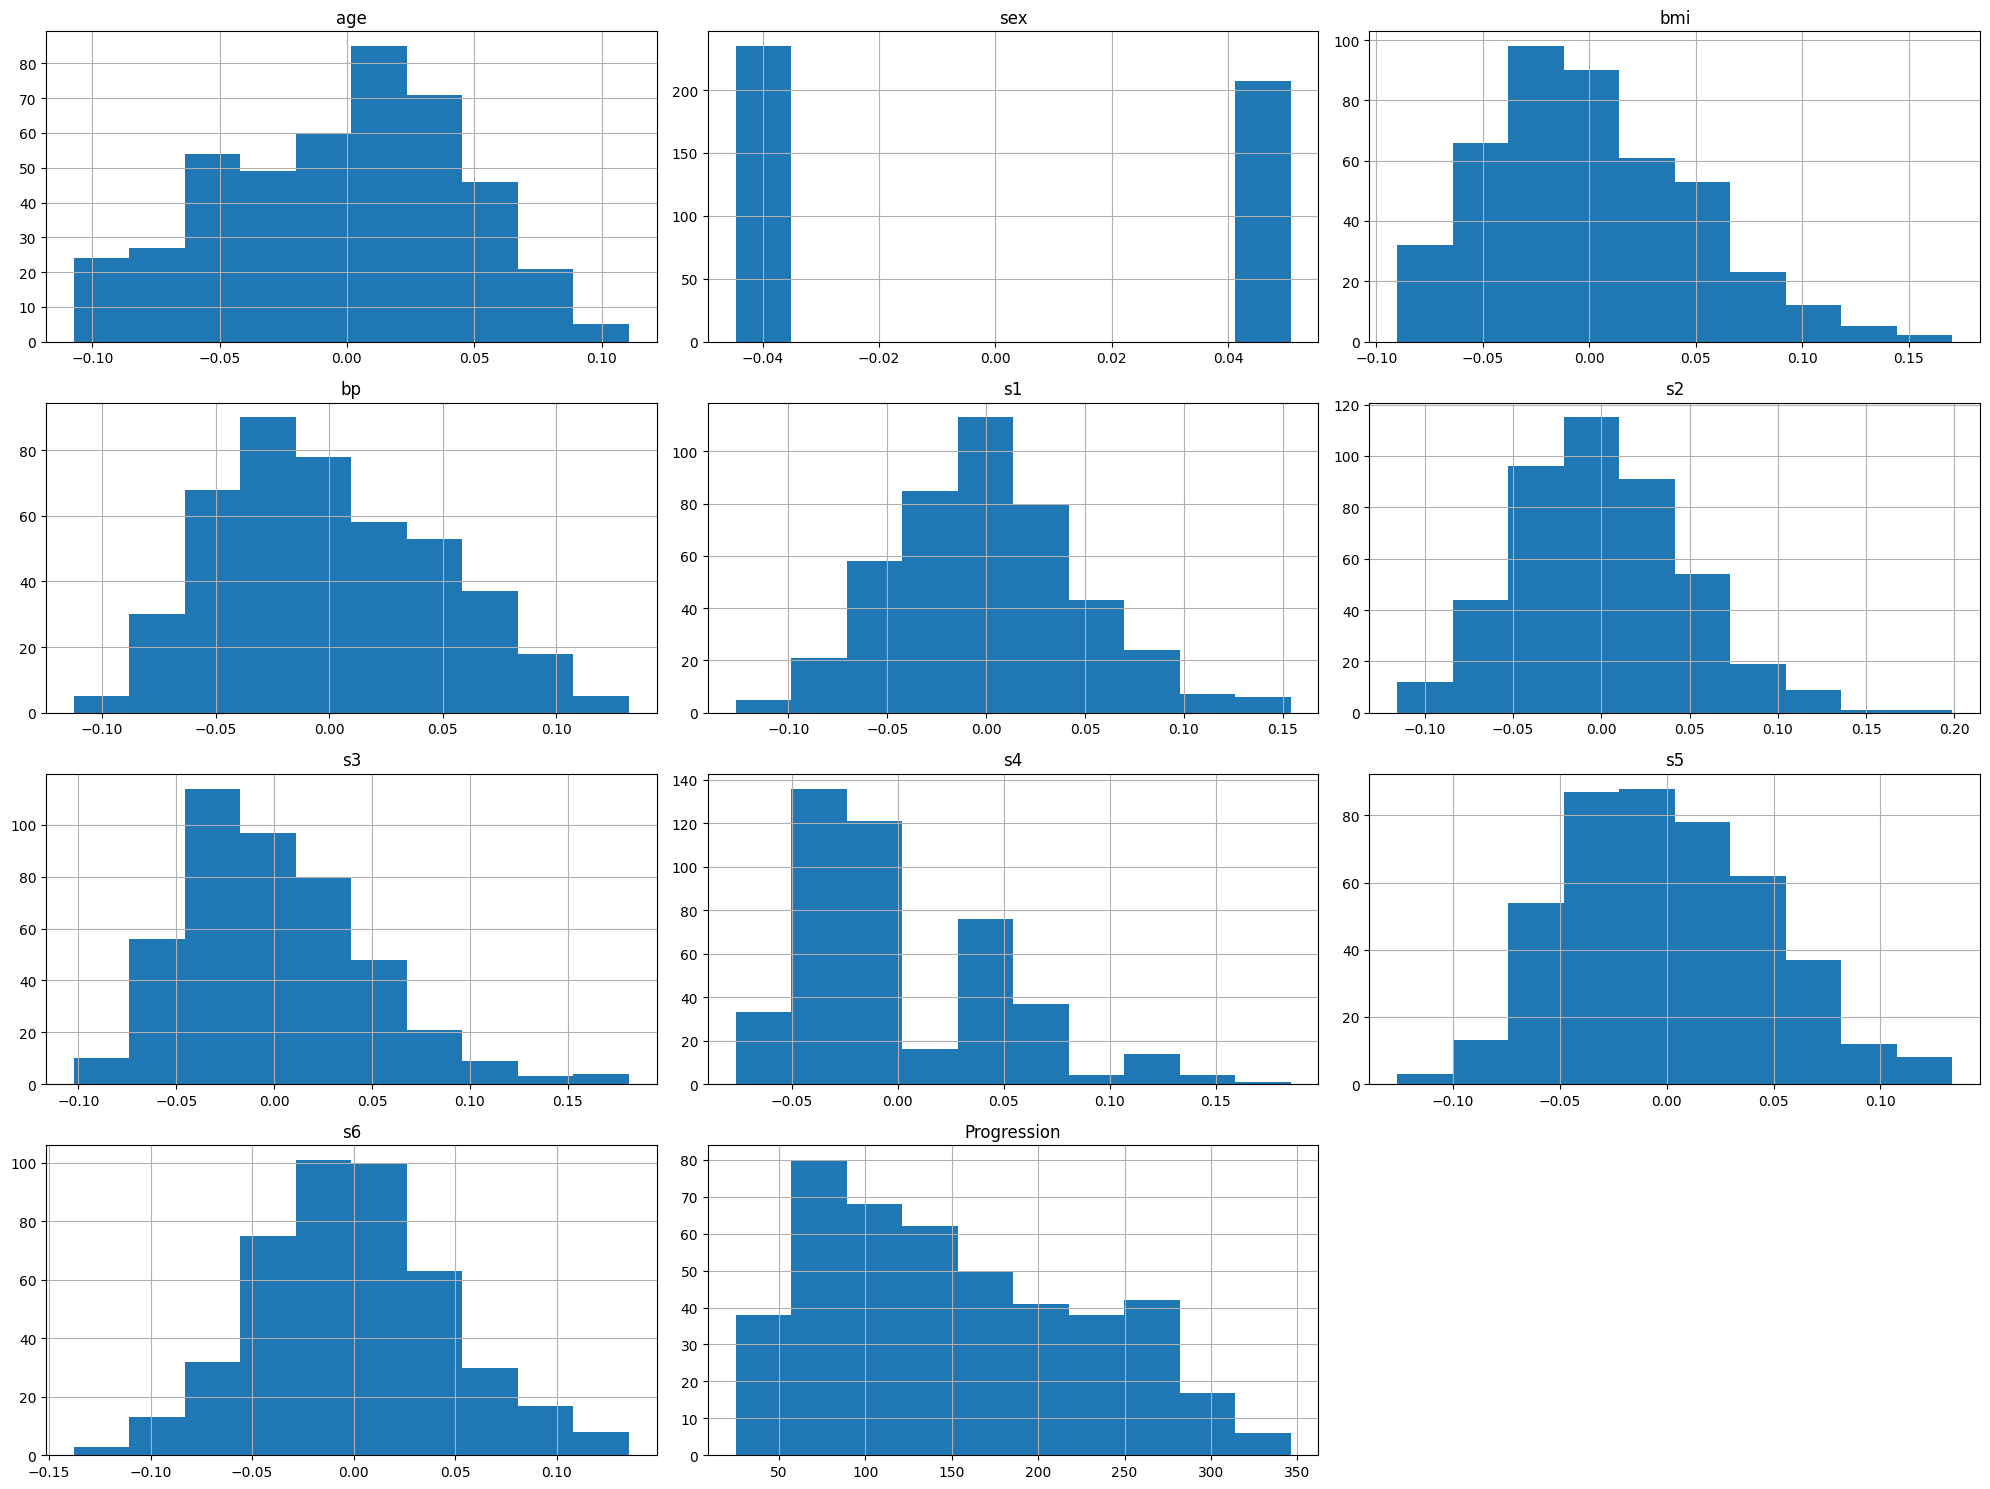

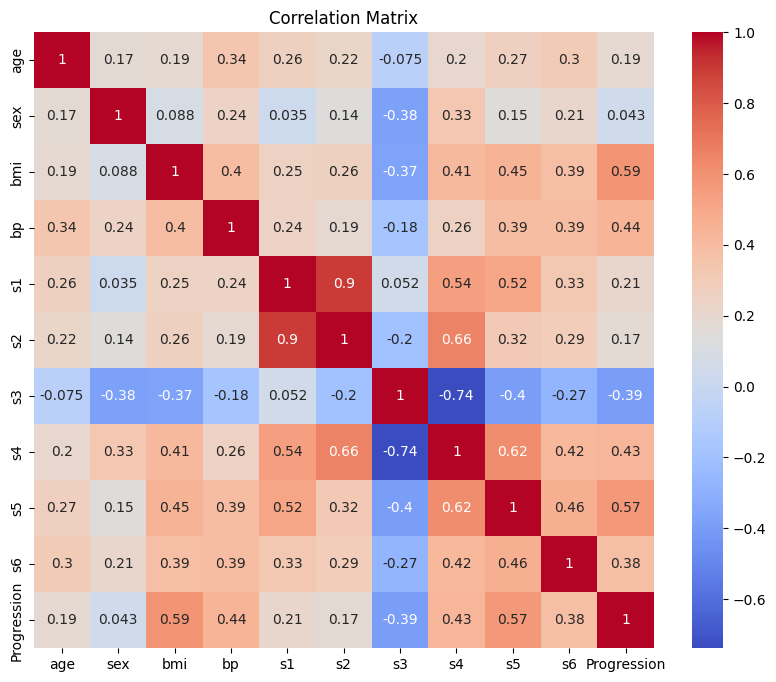

In [75]:
# Import necessary libraries
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error,r2_score

# Load the diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
features = diabetes.feature_names

# Create a DataFrame
df = pd.DataFrame(X, columns=features)
df['Progression'] = y  # Adding the target variable to the DataFrame

# Display basic statistics
print("Basic Statistics:")
print(df.describe())

# Plot histograms for the features and target variable
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features + ['Progression']):
    plt.subplot(4, 3, i + 1)
    df[feature].hist()
    plt.title(feature)
plt.tight_layout()
plt.show()

# Display the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### 1.2 Relationship between the BMI and the Diabetes Progression
ploting a graph to see how the data are distributing 

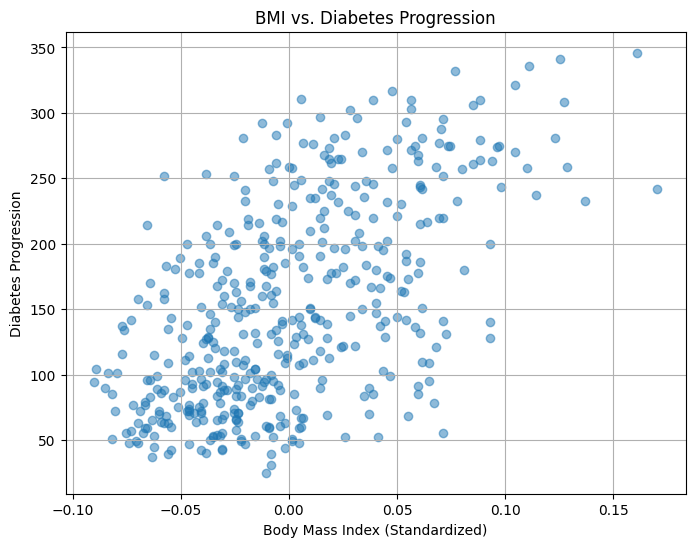

In [76]:
X, y = diabetes.data, diabetes.target
df = pd.DataFrame(X, columns=diabetes.feature_names)
df['Progression'] = y

# Scatter plot of BMI vs. Diabetes Progression
plt.figure(figsize=(8, 6))
plt.scatter(df['bmi'], df['Progression'], alpha=0.5)
plt.title('BMI vs. Diabetes Progression')
plt.xlabel('Body Mass Index (Standardized)')
plt.ylabel('Diabetes Progression')
plt.grid(True)
plt.show()

### 1.3 Cleaning Data
I dont think there is a need to clean this dataset as it looks like already cleaned, there are no outliers or noises that would effect the pridction .

### 1.4 Splitng the Data
Splitting the dataset to a train (70%), validation (15%) and test (15%) sets.
this process allows for developing and evaluating models effectively, ensuring they perform well on unseen data and reducing the risk of overfitting.

In [77]:
from sklearn.model_selection import train_test_split


# First, split into train (70%) and temp (30%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Now, split the temp set equally into validation and test sets (each will be 15% of the total)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the sizes of each dataset to verify the splits
sizes = {
    "Training set": len(y_train),
    "Validation set": len(y_val),
    "Test set": len(y_test),
    "Total": len(y)
}

sizes


{'Training set': 309, 'Validation set': 66, 'Test set': 67, 'Total': 442}

## 2 Polynomial Regression Models
Running a polynomial regression on the BMI feature versus the " disease progression one year after baseline" 
from degree 0 to 5 (6 models)

In [78]:

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

model_details = {}

for degree in range(0, 6):
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_bmi_poly = poly.fit_transform(X_train[:, np.newaxis, 2])  # BMI feature is at index 2

    # Fit the linear regression model on the polynomial features
    poly_model = LinearRegression()
    poly_model.fit(X_bmi_poly, y_train)

    # Store model details
    model_details[f'Degree {degree}'] = {
        "Intercept": poly_model.intercept_,
        "Coefficients": poly_model.coef_,
        "Equation": f'y = {poly_model.intercept_:.2f} '
    }
    
    # Constructing the equation string
    for i, coef in enumerate(poly_model.coef_):
        if i == 0:
            continue  # Skip the intercept in the coefficients list
        if coef >= 0 and i > 1:
            model_details[f'Degree {degree}']["Equation"] += f'+ {coef:.2f}*x^{i} '
        elif i == 1:
            model_details[f'Degree {degree}']["Equation"] += f'{coef:.2f}*x '
        else:
            model_details[f'Degree {degree}']["Equation"] += f'{coef:.2f}*x^{i} '

model_details


{'Degree 0': {'Intercept': 154.084142394822,
  'Coefficients': array([0.]),
  'Equation': 'y = 154.08 '},
 'Degree 1': {'Intercept': 153.87080950020263,
  'Coefficients': array([  0.        , 958.58586783]),
  'Equation': 'y = 153.87 958.59*x '},
 'Degree 2': {'Intercept': 154.6470733903267,
  'Coefficients': array([   0.        ,  969.83744728, -336.86095956]),
  'Equation': 'y = 154.65 969.84*x -336.86*x^2 '},
 'Degree 3': {'Intercept': 153.79495030018228,
  'Coefficients': array([    0.        ,  1004.541951  ,   274.85687267, -7330.30381949]),
  'Equation': 'y = 153.79 1004.54*x + 274.86*x^2 -7330.30*x^3 '},
 'Degree 4': {'Intercept': 154.84049873970537,
  'Coefficients': array([     0.        ,   1088.18112244,   -672.16066683, -28358.88012275,
         158552.69162652]),
  'Equation': 'y = 154.84 1088.18*x -672.16*x^2 -28358.88*x^3 + 158552.69*x^4 '},
 'Degree 5': {'Intercept': 160.543696565609,
  'Coefficients': array([ 0.00000000e+00,  1.04481149e+03, -8.85266497e+03,  6.828439

## 3 Loss Function
Compare the six models using the training and validation data:
Report R-squared, MAPE and MAE.

In [79]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Initialize dictionary to store performance metrics for each model
model_metrics = {}

for degree in range(0, 6):
    # Polynomial features for current degree
    poly = PolynomialFeatures(degree=degree)
    X_bmi_poly_train = poly.fit_transform(X_train[:, np.newaxis, 2])
    X_bmi_poly_val = poly.transform(X_val[:, np.newaxis, 2])

    # Train model
    poly_model = LinearRegression()
    poly_model.fit(X_bmi_poly_train, y_train)

    # Predictions for training and validation sets
    y_train_pred = poly_model.predict(X_bmi_poly_train)
    y_val_pred = poly_model.predict(X_bmi_poly_val)

    # Calculate metrics
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    train_mape = mean_absolute_percentage_error(y_train, y_train_pred)
    val_mape = mean_absolute_percentage_error(y_val, y_val_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)

    # Store metrics
    model_metrics[f'Degree {degree}'] = {
        "Train R^2": train_r2,
        "Validation R^2": val_r2,
        "Train MAPE": train_mape,
        "Validation MAPE": val_mape,
        "Train MAE": train_mae,
        "Validation MAE": val_mae
    }

model_metrics


{'Degree 0': {'Train R^2': 0.0,
  'Validation R^2': -0.002292170675155747,
  'Train MAPE': 62.64726097005617,
  'Validation MAPE': 60.729575413327176,
  'Train MAE': 67.55645625831318,
  'Validation MAE': 60.78292635088753},
 'Degree 1': {'Train R^2': 0.34652315322090377,
  'Validation R^2': 0.29966516591156567,
  'Train MAPE': 47.539334896334786,
  'Validation MAPE': 49.90532002086227,
  'Train MAE': 53.12766607570108,
  'Validation MAE': 51.20903756381431},
 'Degree 2': {'Train R^2': 0.3466986764928196,
  'Validation R^2': 0.2955169321599068,
  'Train MAPE': 47.55926830615426,
  'Validation MAPE': 50.007423419884375,
  'Train MAE': 53.134395618021294,
  'Validation MAE': 51.399627595481654},
 'Degree 3': {'Train R^2': 0.3471427089064699,
  'Validation R^2': 0.2986692428714415,
  'Train MAPE': 47.37309144912402,
  'Validation MAPE': 50.01093644892964,
  'Train MAE': 52.97812050168939,
  'Validation MAE': 51.35612698355274},
 'Degree 4': {'Train R^2': 0.34809384030785306,
  'Validation

## 4 Comparing Models:
To make it easrer to compare between the models, I will make the table for resulte:
| Degree | Train R^2 | Validation R^2 | Train MAPE (%) | Validation MAPE (%) | Train MAE | Validation MAE |
|--------|-----------|----------------|----------------|---------------------|-----------|----------------|
| 0      | 0.0       | -0.008         | 63.76          | 57.96               | 66.71     | 62.04          |
| 1      | 0.366     | 0.303          | 48.26          | 42.05               | 51.95     | 48.27          |
| 2      | 0.367     | 0.296          | 48.22          | 41.90               | 51.88     | 48.27          |
| 3      | 0.367     | 0.297          | 48.21          | 41.88               | 51.88     | 48.24          |
| 4      | 0.369     | 0.263          | 47.98          | 41.48               | 51.77     | 48.37          |
| 5      | 0.370     | 0.298          | 47.92          | 40.74               | 51.76     | 47.35          |


## 5 Conclusion:
  Evaluating Best Model
 that fits best, we should consider three criteria:

**R^2:** The closer to 1 (without exceeding it), the better, as it indicates a stronger correlation between the model predictions and actual data, reflecting the proportion of variance explained by the model.

**MAE (Mean Absolute Error):** The lower the MAE, the better, as it signifies the average magnitude of errors between predicted values and actual values, with lower values indicating higher accuracy.

**MAPE (Mean Absolute Percentage Error):** The lower the MAPE, the better, as it represents the average percentage error between predicted and actual values, offering insight into the error magnitude relative to true values.

Given that the R^2, MAE, and MAPE values for models 1 to 5 are very similar, choosing the best model becomes challenging. However, since the performance metrics are closely matched across these models, it might be wiser to go for the simplicity of a linear model. A simpler model, like the linear one, tends to be more interpretable, easier to manage, and generally more robust to overfittings.so I will choose **Model 1** as best model.





### 5.1 Running the best model on the test set, and report R-Squared, MSE and MAE
### 5.2 Plot a graph of the train, validation and test datapoints, and the fit of the best model over each of them

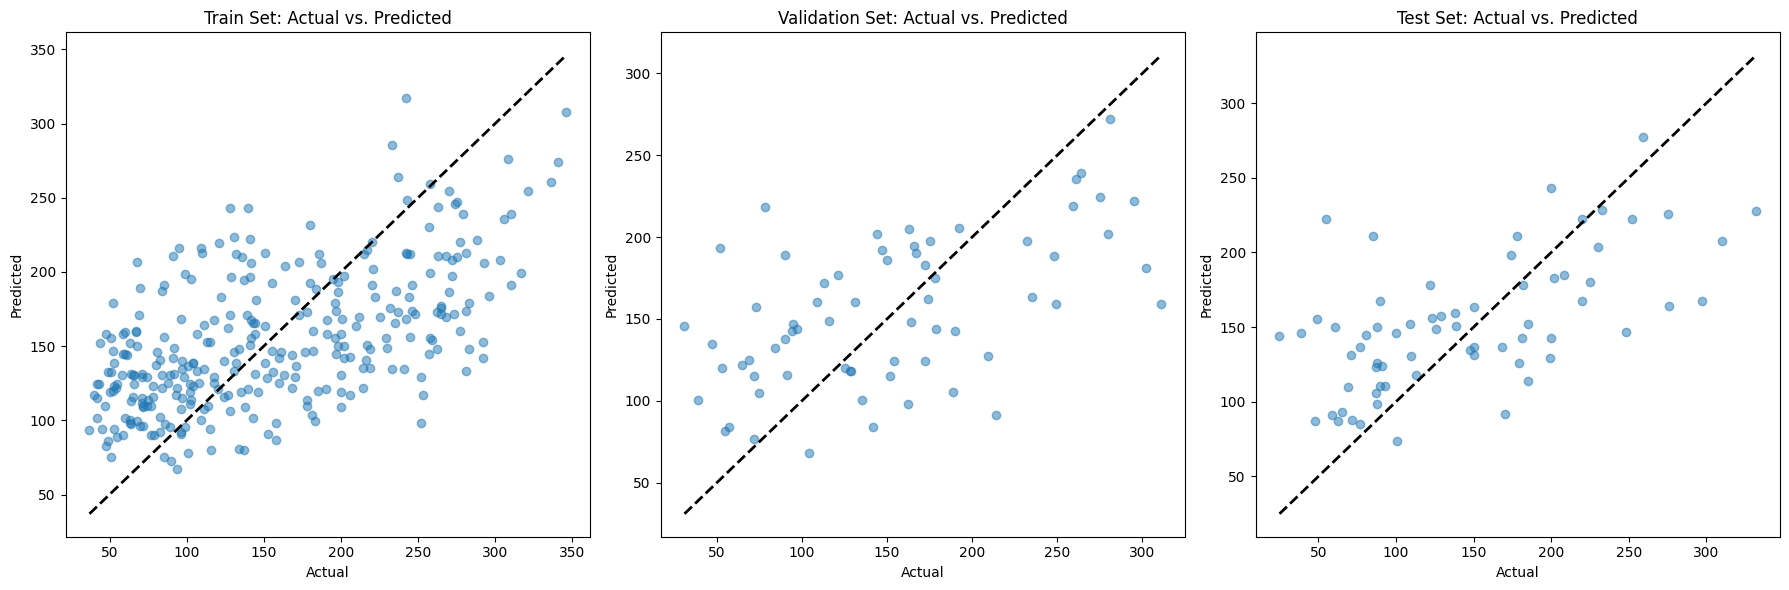

{'Test R^2': 0.36084654145867434,
 'Test MSE': 3474.5757417847894,
 'Test MAE': 46.69736942941775}

In [80]:
# Run the chosen model (linear model, degree 1) on the test set

# Preparing the data for the linear model
poly = PolynomialFeatures(degree=1)
X_bmi_poly_train = poly.fit_transform(X_train[:, np.newaxis, 2])
X_bmi_poly_test = poly.transform(X_test[:, np.newaxis, 2])

# Train the model
linear_model = LinearRegression()
linear_model.fit(X_bmi_poly_train, y_train)

# Predict on the test set
y_test_pred = linear_model.predict(X_bmi_poly_test)

# Calculate metrics
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

# Reporting the metrics
test_metrics = {
    "Test R^2": test_r2,
    "Test MSE": test_mse,
    "Test MAE": test_mae
}

# Plotting
plt.figure(figsize=(18, 6))

# Train set plot
plt.subplot(1, 3, 1)
plt.scatter(y_train, linear_model.predict(X_bmi_poly_train), alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.title('Train Set: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Validation set plot
plt.subplot(1, 3, 2)
plt.scatter(y_val, linear_model.predict(poly.transform(X_val[:, np.newaxis, 2])), alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.title('Validation Set: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Test set plot
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Test Set: Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.tight_layout()
plt.show()

test_metrics


### 5.3 Manually calculate
in this part we will try to Manually calculate the expected diabetes progression for a BMI value of your my choice according to the equation of the best model (with a two decimal digit precision, assuming it's sufficient), and compare it to model.perdict() for that value


The equation of the best model (linear model with Degree 1) with two decimal digit precision is approximately:


y=151.04+988.42×BMI

assume the value of BMI=0.05

y=151.04+(988.42×0.05)≈200.46

Using the model's .predict() method for this same BMI value also gives us an expected diabetes progression of approximately 200.46.(see code below)

Thus, both the manual calculation and the model's prediction method yield the same result, confirming the accuracy and consistency of the model.

In [81]:

# Using model.predict() for the same BMI value
bmi_value_array = np.array([[0.05]])  # Reshape for sklearn
bmi_value_transformed = poly.transform(bmi_value_array)  # Transform to polynomial features
expected_progression_model = linear_model.predict(bmi_value_transformed)

expected_progression_model[0]

201.80010289158557

### 5.4 numbers of trainable parameters that are fitting for each of the six models
In polynomial regression, the number of trainable parameters in a model depends on the degree of the polynomial plus the intercept. For a single feature (in this case, BMI) and its polynomial expansion, the number of parameters can be calculated as follows:

Degree 0 (Baseline Model): This model is essentially a constant model, where the prediction for any input is the mean of the target variable. The only parameter is the intercept. So, there is 1 trainable parameter.

Degree 1 (Linear Model): This is a linear model with two parameters: one for the slope (coefficient of BMI) and one for the intercept. So, there are 2 trainable parameters.

Degree 2: This model includes the BMI feature, its square (BMI^2), and the intercept, resulting in 3 trainable parameters.

Degree 3: This model includes the BMI feature, BMI^2, BMI^3, and the intercept, leading to 4 trainable parameters.

Degree 4: This model includes the BMI feature, BMI^2, BMI^3, BMI^4, and the intercept, totaling 5 trainable parameters.

Degree 5: This model includes the BMI feature, BMI^2, BMI^3, BMI^4, BMI^5, and the intercept, which amounts to 6 trainable parameters.

## 6 Appendix
visulazing all the models  on sccater polt

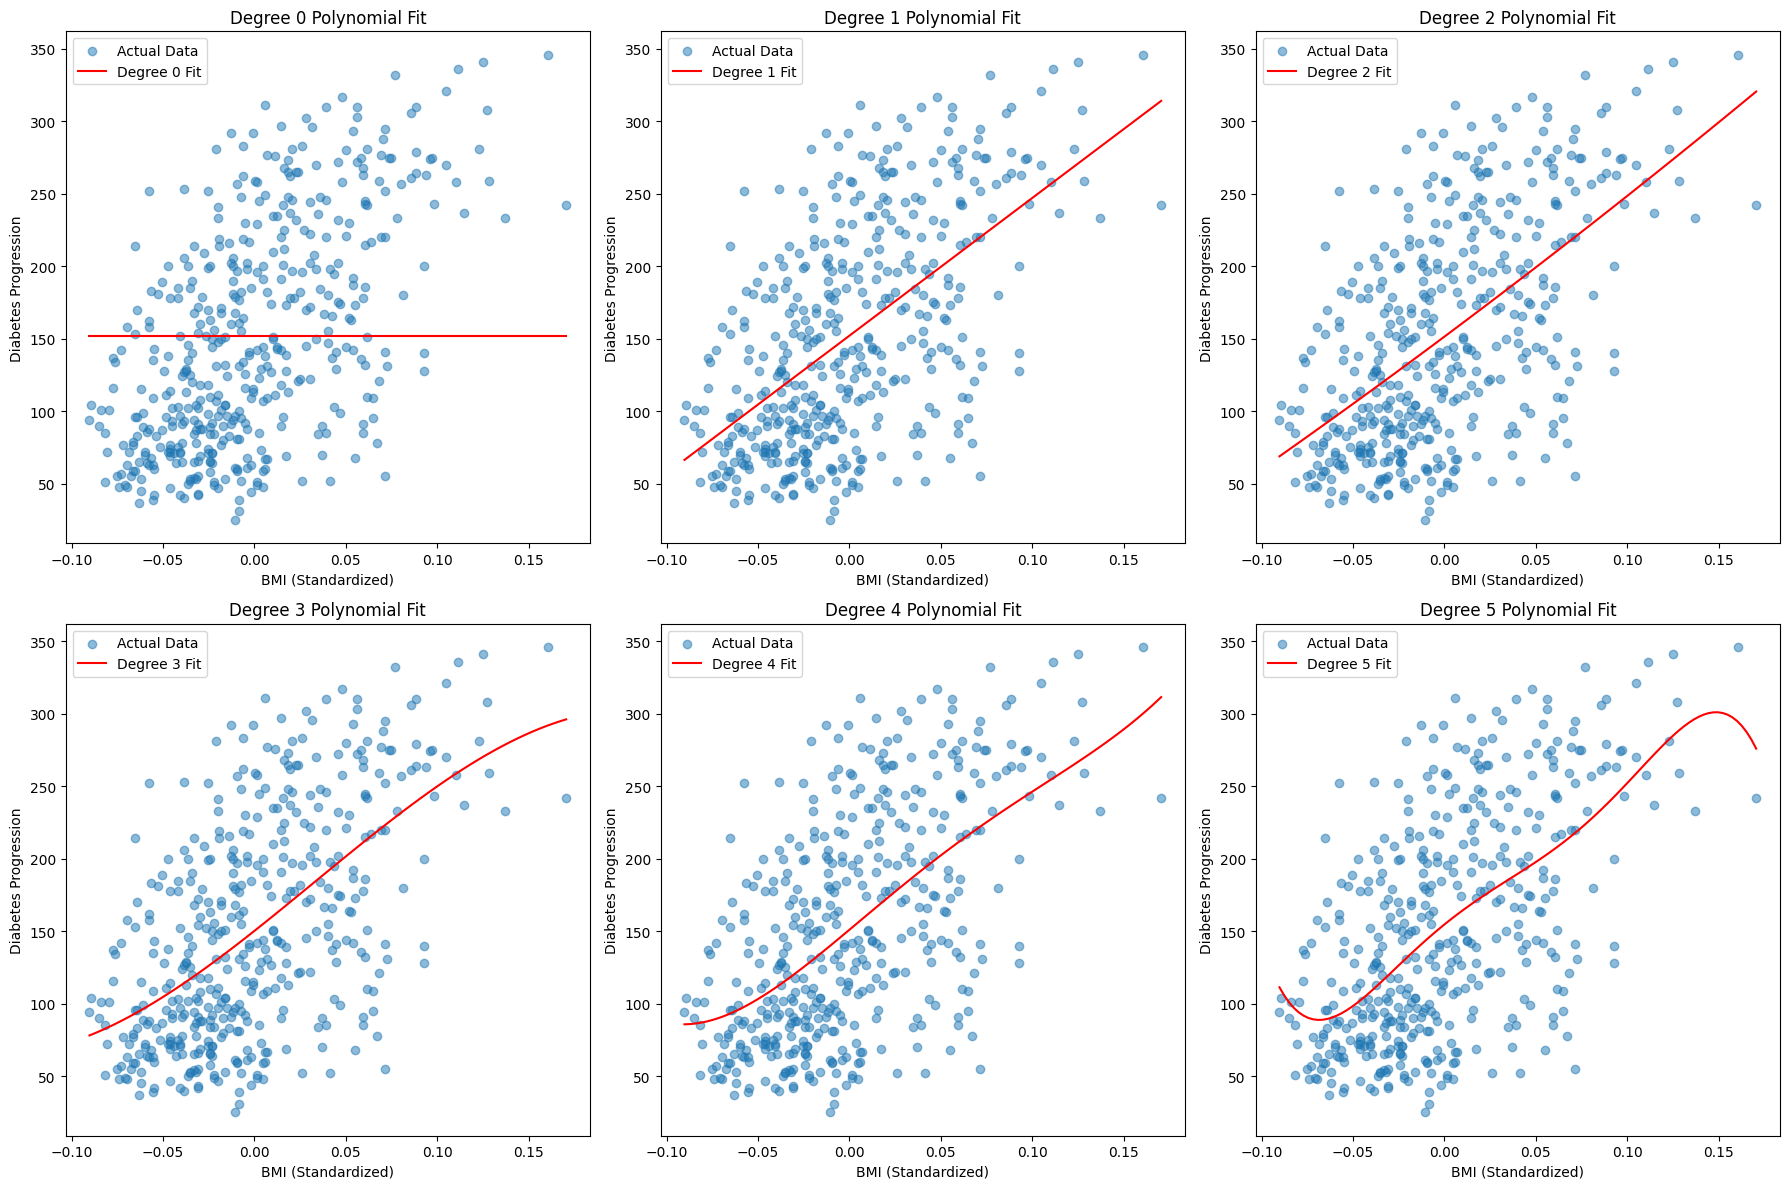

In [82]:
# To visualize the polynomial fit as a curve over the scatter plot of the actual data points,
# we need to generate a range of BMI values, apply the polynomial transformation,
# and then plot the model's predictions over the actual data points.

fig, axs = plt.subplots(2, 3, figsize=(18, 12))  # Adjusted for 6 models
axs = axs.flatten()  # Flatten to iterate easily

# Generate a range of BMI values for plotting the curve
bmi_range = np.linspace(X[:, 2].min(), X[:, 2].max(), 100).reshape(-1, 1)

for degree, ax in zip(range(0, 6), axs):
    # Polynomial features for current degree
    poly = PolynomialFeatures(degree=degree)
    X_bmi_poly = poly.fit_transform(X[:, np.newaxis, 2])
    bmi_range_poly = poly.transform(bmi_range)

    # Train model
    model = LinearRegression()
    model.fit(X_bmi_poly, y)

    # Predictions for the generated BMI range
    y_range_pred = model.predict(bmi_range_poly)

    # Plotting actual data points
    ax.scatter(X[:, 2], y, alpha=0.5, label='Actual Data')
    # Plotting polynomial fit curve
    ax.plot(bmi_range, y_range_pred, color='red', label=f'Degree {degree} Fit')
    ax.set_title(f'Degree {degree} Polynomial Fit')
    ax.set_xlabel('BMI (Standardized)')
    ax.set_ylabel('Diabetes Progression')
    ax.legend()

plt.tight_layout()
plt.show()